In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ERROR! Session/line number was not unique in database. History logging moved to new session 2
/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


In [26]:
import  matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
dirname
filenames

['trainLabels.csv', 'train.csv', 'test.csv']

# Data Pre-Processing

In [4]:
train_df=pd.read_csv(os.path.join(dirname, filenames[1]))
train_df.columns
train_labels=pd.read_csv(os.path.join(dirname, filenames[0]))
print(train_labels.head(3))
test_df=pd.read_csv(os.path.join(dirname, filenames[2]))
print(test_df.head(3))

   1
0  0
1  0
2  1
   2.8089094884322816  -0.2428941541280098  -0.54642134078742799  \
0           -0.374101             0.537669              0.081063   
1           -0.088370             0.154743              0.380716   
2           -0.685635             0.501283              1.873375   

   0.25516185655651813  1.7497359401586778  -0.030457614747139938  \
0             0.756773            0.915231               2.557282   
1            -1.176126            1.699867              -0.258627   
2             0.215224           -3.983468              -0.103637   

   -1.3220705648016891  3.5780706827705329  -0.66757846469285065  \
0             3.703187            1.673835             -0.764122   
1            -1.384999            1.093584              1.596633   
2             4.136113           -0.225431             -1.515015   

   -0.88425685382194696  ...  -0.26168811207868709  -0.22437538915802702  \
0             -1.228040  ...             -0.969463              0.574154   
1    

In [5]:
#Assigning the column header as the first row for train and the test datasets
train_df=pd.concat([train_df.columns.to_frame().T, train_df],ignore_index=True)
print(train_df.shape)
test_df=pd.concat([test_df.columns.to_frame().T, test_df],ignore_index=True)
print(test_df.shape)
train_labels=pd.concat([train_labels.columns.to_frame().T, train_labels],ignore_index=True)
print(train_labels.shape)

(1000, 40)
(9000, 40)
(1000, 1)


In [6]:
train_labels=train_labels.astype(int)

In [7]:
train_labels.dtypes

1    int64
dtype: object

In [8]:
#Changing the column names of the dataframe for train and the test dataframe
col=[]
for i in range(train_df.shape[1]):
    col.append(f'f_{i}')
train_df.columns=col
test_df.columns=col
train_labels.columns=['label']

In [9]:
train_df.columns

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18',
       'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27',
       'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36',
       'f_37', 'f_38', 'f_39'],
      dtype='object')

In [10]:
train_df.dtypes
train_df=train_df.astype(float)
test_df=test_df.astype(float)

In [11]:
## Checking for missing values
train_df.isna().sum()

f_0     0
f_1     0
f_2     0
f_3     0
f_4     0
f_5     0
f_6     0
f_7     0
f_8     0
f_9     0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
f_29    0
f_30    0
f_31    0
f_32    0
f_33    0
f_34    0
f_35    0
f_36    0
f_37    0
f_38    0
f_39    0
dtype: int64

# Exploratory Data Analysis

Variance measures the spread or dispersion of data points in a dataset. It quantifies how much individual data points deviate from the mean (average) of the dataset. A high variance indicates that data points are more spread out, while a low variance suggests that data points are closer to the mean.


In [12]:
print(train_df.var())
print(train_df.skew())

f_0      1.016634
f_1      1.032862
f_2      0.958654
f_3      0.942015
f_4     20.601011
f_5      0.978375
f_6      4.489394
f_7      4.982968
f_8      1.002128
f_9      1.027223
f_10     1.053343
f_11     0.971977
f_12    20.503656
f_13     0.991324
f_14     4.685264
f_15     1.004967
f_16     0.941679
f_17     1.000261
f_18     4.735065
f_19     0.975529
f_20     0.935635
f_21     0.961026
f_22     4.747072
f_23    17.993742
f_24     1.039516
f_25     0.991521
f_26     0.996367
f_27     1.062157
f_28     5.275372
f_29     5.810281
f_30     1.023426
f_31     1.002752
f_32     5.017328
f_33     1.045416
f_34     4.499834
f_35     1.014138
f_36     4.963433
f_37     0.995275
f_38     4.088571
f_39     4.183819
dtype: float64
f_0    -0.007464
f_1     0.005842
f_2    -0.015666
f_3    -0.024957
f_4     0.233864
f_5     0.053246
f_6    -0.127727
f_7     0.004227
f_8    -0.032210
f_9     0.145751
f_10   -0.195532
f_11    0.072041
f_12    0.066800
f_13    0.120964
f_14    0.048827
f_15   -0.

Visualising with boxplots


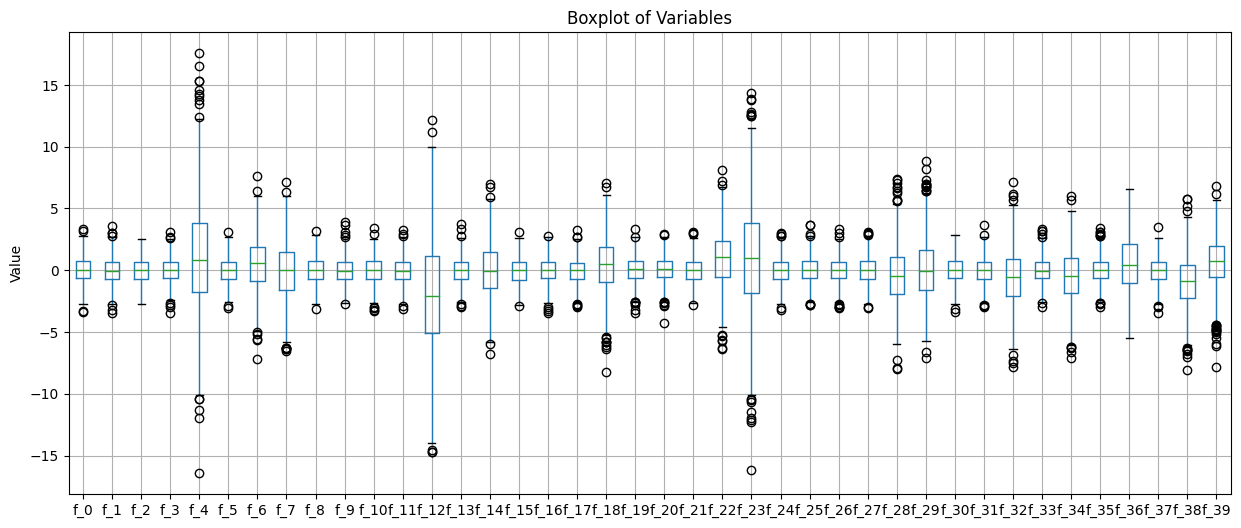

In [13]:
plt.figure(figsize=(15,6))
train_df.boxplot()
plt.title('Boxplot of Variables')
plt.ylabel('Value')
plt.show()

f_4,f_12,f_23 features have high number of outliers.

In [14]:
train_labels

,label
0,1
1,0
2,0
3,1
4,0
...,...
995,0
996,1
997,1
998,0


In [15]:
train_df_1=pd.concat([train_df, train_labels],axis=1)
train_df_1

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,label
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141,0
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567,1
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686,1
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217,0


In [16]:
correlation_matrix=pd.DataFrame(train_df.corr()) #Taking the correlartion between dependent variables

correlation_matrix.reset_index(level=0, inplace=True)
correlation_matrix.head()
#Converting the data from wide to long format
correlation_matrix=pd.melt(correlation_matrix, id_vars=['index'], var_name='Variable', value_name='corr')


In [17]:
correlation_matrix[(correlation_matrix['corr'].abs() > 0.5) & (correlation_matrix['corr'] < 1)]

,index,Variable,corr
183,f_23,f_4,0.568959
188,f_28,f_4,-0.522373
508,f_28,f_12,0.616709
924,f_4,f_23,0.568959
1124,f_4,f_28,-0.522373
1132,f_12,f_28,0.616709


Text(0.5, 1.0, 'f_23 vs f_4')

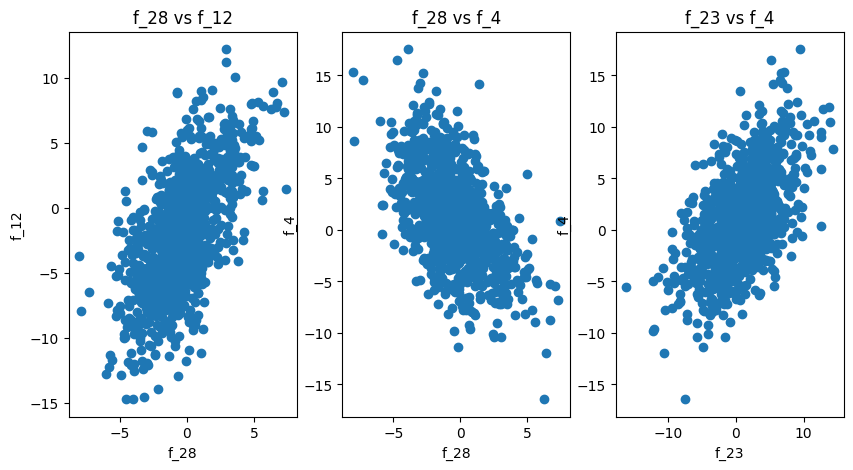

In [18]:
fig,axes=plt.subplots(1,3,figsize=(10,5))
axes[0].scatter(train_df['f_28'],train_df['f_12'])
axes[0].set_xlabel('f_28')
axes[0].set_ylabel('f_12')
axes[0].set_title('f_28 vs f_12')
axes[1].scatter(train_df['f_28'],train_df['f_4'])
axes[1].set_xlabel('f_28')
axes[1].set_ylabel('f_4')
axes[1].set_title('f_28 vs f_4')
axes[2].scatter(train_df['f_23'],train_df['f_4'])
axes[2].set_xlabel('f_23')
axes[2].set_ylabel('f_4')
axes[2].set_title('f_23 vs f_4')

From the scatter plots and correlation matrix it can be inferred that these three features exhibit strong correlation with each other. There could be redundancy in the information and noise introuduced as a result of that. Linear dimensionality reduction techniques can be evaluated to check the separation of labels.

In [19]:

train_df_z = train_df.apply(stats.zscore)
X=train_df_z
y=train_df_1['label']

### PCA plot of the features

(1000, 40)
(1000, 4)
explained variance ratio (first five components): [0.07185089 0.06222992 0.04366807 0.03840563]


/tmp/ipykernel_33/2949736924.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


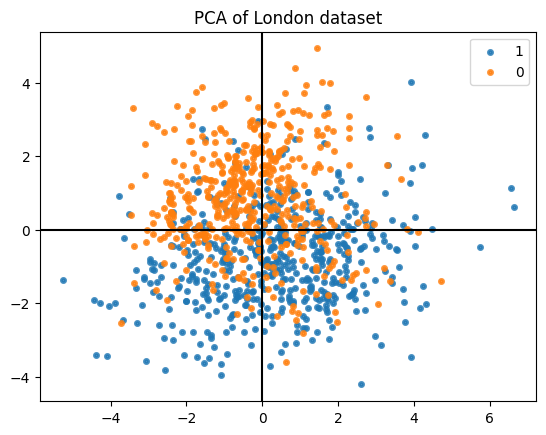

In [23]:
pca = PCA(n_components=4, random_state=42)
X_pca = pca.fit(X).transform(X)
target_names=train_df_1.label.unique()
print(X.shape)
print(X_pca.shape)
print("explained variance ratio (first five components): %s"
    % str(pca.explained_variance_ratio_))
np.cumsum(pca.explained_variance_ratio_)

plt.figure()
#colors = ["navy", "turquoise", "darkorange","green","black"]
lw = 2
for i in target_names:
        plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], marker='.',label=i, cmap="Dark2",
        alpha=0.8, lw=lw)
plt.legend(loc="best")
plt.title("PCA of London dataset")
#plt.ylim(-4,4)
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

In [24]:
pca.explained_variance_ratio_

array([0.07185089, 0.06222992, 0.04366807, 0.03840563])

Linear models might not be a great choice.

###  Produce a scree-plot to look at the cumulative variance represented by the PCA eigenvectors.


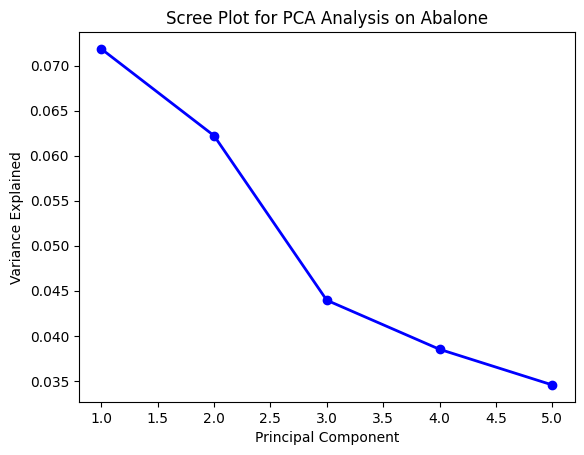

In [37]:
pca = PCA(n_components=5)  ## 5 components
pca_m=pca.fit(X)
X_pca = pca.fit(X).transform(X)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot for PCA Analysis on Abalone')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### TSNE Plot

In [35]:
from sklearn import manifold
n_components = 2
X_t = manifold.TSNE(n_components=2, init="pca", random_state=27)
Y = X_t.fit_transform(X)
Y.shape
tsne_result_df = pd.DataFrame({'tsne_1': Y[:,0], 'tsne_2': Y[:,1], 'label': y})

/tmp/ipykernel_33/4015223227.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


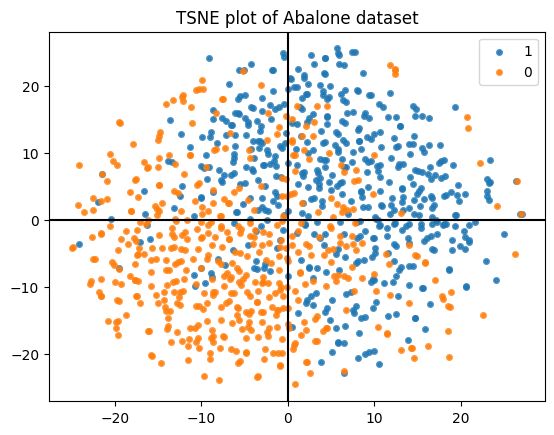

In [36]:
for i in target_names:
        plt.scatter(
         tsne_result_df[tsne_result_df.label == i ].tsne_1, tsne_result_df[tsne_result_df.label == i ].tsne_2, marker='.',label=i, cmap="Dark2",
        alpha=0.8, lw=lw)    
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("TSNE plot of Abalone dataset")
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

t-sne plot is used for investigation or evaluating segmentations. In our case, the extraploation has not helped much in clustering the label with the help of features.

Use of non linear 